# Recoomender System: A Collaborative Filtering Algorithm


Collaborative filtering covers some limitations of content-based algorithms, and it considers the similarities between users and items. It recommends the items to the users based on the similarities between the users who have already purchased similar items.  

Basically, there is a user-items rating matrix. The ratings are scores that users give to the items. 
This matrix is sparse, and we need to fill it in based on similarities.
Past users already have rated some items either explicitly(by expressing if they liked or disliked the things or by giving some rates from 0 to 5) or implicitly (it can be obtained based on the clicks, watches items, etc.).

When a user watches an item, this technique recommends other items based on the similarities between this item with other items and similarities between this user with the users who have already watched this item. 


Most websites like Amazon, YouTube, and Netflix, use collaborative filtering algorithms as a part of their sophisticated recommendation systems. You can use this technique to build recommenders that give user suggestions based on the likes and dislikes of similar users.

The user-based model's goal is to predict what a user will like based on past interactions between all users and items, e.g., matrix factorization, factorization machines, deep learning, word2vec.


# Collaborative Filtering Advantages & Disadvantages

In this part, we talk about the collaborating filtering algorithm.

I would like to thank many instructors who helped me a lot during my Ph. D. working on such problems. Also, I would like to thank IVADO workshop, which really helped me with their very rich & beneficial tutorials & workshops with distinguished presenters that attending to that workshop was a bridge to success for me.

The advantage is that no domain knowledge is necessary; however, it cannot handle fresh items. Also, it is to include side features for query/item.

Is collaborative filtering supervised or unsupervised?
Collaborative filtering is unsupervised learning which we make predictions from ratings supplied by people. Each row represents the ratings of movies from a person, and each column indicates the ratings of a film. In Collaborative Filtering, we do not know the feature set before hands.

# Memory based algorithm: 

These algorithms consider a user x and find similar users and recommend the items to the user x that have been already watched by the similar users.
Or, it will consider an item, then find the users that watched those items, and it finds other things that those users like and recommend similar items. The most well-known Method is called COSINE SIMILARITY. 

# Model Based
This category covers the Model-based approaches, which involve a step to reduce or compress the large but sparse user-item matrix. For understanding this step, a basic knowledge of dimensionality reduction can be beneficial.

Dimensionality Reduction

In the user-item matrix, there are two dimensions:

The number of users
      - The number of items
If the matrix is mostly empty, reducing dimensions can improve the algorithm's performance in terms of both space and time. Matrix factorization is a technique to do this. 


# Matrix factorization is collaborative filtering?
Find a handy tutorial for matrix factorization: https://www.youtube.com/watch?v=ZspR5PZemcs&t=1722s
Matrix factorization is a class of collaborative filtering algorithms used in recommender systems. Matrix factorization algorithm decomposes the user-item interaction matrix into the two lower dimensionality rectangular matrices.

Algorithms for Matrix Factorization
One of the popular algorithms to factorize a matrix is the singular value decomposition (SVD) algorithm. SVD came into the limelight when matrix factorization was seen performing well in the Netflix prize competition. Other algorithms include PCA and its variations, NMF, and so on. Autoencoders can also be used for dimensionality reduction in case you want to use Neural Networks.

-tags are features related to movies or users. Since matrix factorization does not user features, it is unsupervised learning.



# Matrix factorization is an unsupervised learning.  


 In this work, unsupervised learning is considered in the domain of Recommender Systems (RS). This means learning new recommendations from unlabeled recordings of computer state and user action data.
The training set and testing set process are not the same as what we do for supervised learning. We have some data that some of them are not labeled; we try to label unvisited items based on the labeled items. We can not fit the model and use it for testing.

However, the inverse optimization is supervised learning. 

It is better to classify recommender systems as a separate technique from the supervised and unsupervised technique. 
https://www.researchgate.net/figure/Machine-learning-algorithms-a-Supervised-learning-In-this-type-of-learning-the-output_fig2_330702663

Collaborative filtering is applied whenever there is a data set, but we do not know each feature's values. So, we use matrix factorization to impute the user features and items features. 


# Note

There is no label for users and items that you can train a model based on that. There will be a sparse matrix that you predict the ratings for the blank cells. 
Most of the time, the recommender system is a category beside supervised and unsupervised learning. It is used for ranking and separates from other methods. 


# HOW MATRIX FACTORIZATION WORK? 



Imagine there is a matrix of user-item ratings. This matrix is sparse. So, we factorize this matrix to user-tag * tag-item = user-item ranking. 
Since users and items' features are not available, we should find them and learn from past ratings to train the unlabeled data(ratings).
User tag can be if someone like comedy(1,0) or horror(0,1) and tag-item is if a movie is a comedy, horror, etc. (1-5)

We use a gradient descent optimization algorithm to find out the features or tags of users and items. 
For example, most of the time, for Netflix, there is no info available but rating or watching a movie.
So, this is very practical in real-time. We don't know if. A user like a type of movie or not or a movie type is something or not.


We can just have some contextual features, age, gender.


# Data Analysis: 
We use movielens datasets for movie recommendation.

MovieLens 100K Dataset
https://grouplens.org/datasets/movielens/100k/

This data set consists of:
	* 100,000 ratings (1-5) from 943 users on 1682 movies. 
	* Each user has rated at least 20 movies. 



The data was collected through the MovieLens web site
(movielens.umn.edu) during the seven-month period from September 19th, 
1997 through April 22nd, 1998. This data has been cleaned up - users
who had less than 20 ratings or did not have complete demographic
information were removed from this data set. Detailed descriptions of the data file can be found at the end of this file.

------------------------------

u.user     -- Demographic information about the users; this is a tab
              separated list of
              user id | age | gender | occupation | zip code
              The user ids are the ones used in the u.data data set.
              
------------------------------
              
              
              
u.occupation -- A list of the occupations.  

------------------------------


u.data     -- The full u data set, 100000 ratings by 943 users on 1682 items.
              Each user has rated at least 20 movies.  Users and items are
              numbered consecutively from 1.  The data is randomly
              ordered. This is a tab separated list of 
	         user id | item id | rating | timestamp. 
              The time stamps are unix seconds since 1/1/1970 UTC   

------------------------------


u1.base    -- The data sets u1.base and u1.test through u5.base and u5.test
u1.test       are 80%/20% splits of the u data into training and test data.
u2.base       Each of u1, ..., u5 have disjoint test sets; this if for
u2.test       5 fold cross validation (where you repeat your experiment
u3.base       with each training and test set and average the results).
u3.test       These data sets can be generated from u.data by mku.sh.

Matrix factorization is a technique that Netflix has applied it as one of the recommendation  methods. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Data Reading & Pre-Processing


First we read users' features data and change the categorical features into binary collumns to be able to use them. 


u.user -- Demographic information about the users; this is a tab separated list of user id | age | gender | occupation | zip code The user ids are the ones used in the u.data data set.

In [2]:
user_column = ['user id', 'age', 'gender' , 'occupation' ,'zip code']


In [3]:
user_features = pd.read_csv('u.user', sep='|', names=user_column, engine='python')

In [4]:
user_features.head()


,user id,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [5]:
user_features.count()

user id       943
age           943
gender        943
occupation    943
zip code      943
dtype: int64

# Descriptive Analysis

Change gender male, female to binary variables and also categorical to dummies! Also, check the age and make some intervals instead.  


In [6]:
user_features.nunique()

user id       943
age            61
gender          2
occupation     21
zip code      795
dtype: int64

There are 21 different jobs in this set.

In [7]:
pd.get_dummies(user_features['gender'])

,F,M
0,0,1
1,1,0
2,0,1
3,0,1
4,1,0
...,...,...
938,1,0
939,0,1
940,0,1
941,1,0


One column is a predictor of the other columns. If we keep them both, there would be a problem of multi-colinearity. 


Most of the time, number of sub-columns would be n-1. 

In [8]:
gender = pd.get_dummies(user_features['gender'],drop_first=True)

In [9]:
gender.head()

,M
0,1
1,0
2,1
3,1
4,0


In [10]:
jobs= pd.get_dummies(user_features['occupation'])

In [11]:
jobs= jobs.drop(['other'],axis=1)

we remove column 'other'. SO, if the occupations for all columns are zero, it means other is =1

In [12]:
jobs.head()

,administrator,artist,doctor,educator,engineer,entertainment,executive,healthcare,homemaker,lawyer,librarian,marketing,none,programmer,retired,salesman,scientist,student,technician,writer
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# #Concatenation


What we should do is to do concatenation to add new clumns to the data frame : 

In [13]:
user_features = pd.concat([user_features,gender,jobs],axis=1)

In [14]:
user_features.head()

,user id,age,gender,occupation,zip code,M,administrator,artist,doctor,educator,...,librarian,marketing,none,programmer,retired,salesman,scientist,student,technician,writer
0,1,24,M,technician,85711,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2,53,F,other,94043,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,23,M,writer,32067,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4,24,M,technician,43537,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,5,33,F,other,15213,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
#user_features = user_features.drop(['occupation'],axis=1)

In [16]:
user_features.head()

,user id,age,gender,occupation,zip code,M,administrator,artist,doctor,educator,...,librarian,marketing,none,programmer,retired,salesman,scientist,student,technician,writer
0,1,24,M,technician,85711,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2,53,F,other,94043,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,23,M,writer,32067,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4,24,M,technician,43537,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,5,33,F,other,15213,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Now let's consider Age column!

In [17]:
pd.DataFrame(user_features['age'].describe()).T

,count,mean,std,min,25%,50%,75%,max
age,943.0,34.051962,12.19274,7.0,25.0,31.0,43.0,73.0


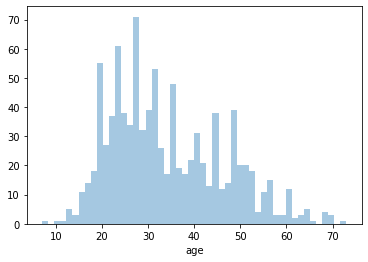

In [18]:
sns.distplot(user_features['age'],bins=50,kde=False)

You can see that minimum age is 7 max is 73 and the mean of age is 34. 

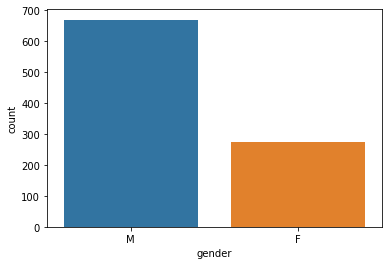

In [19]:
sns.countplot(x='gender', data=user_features)

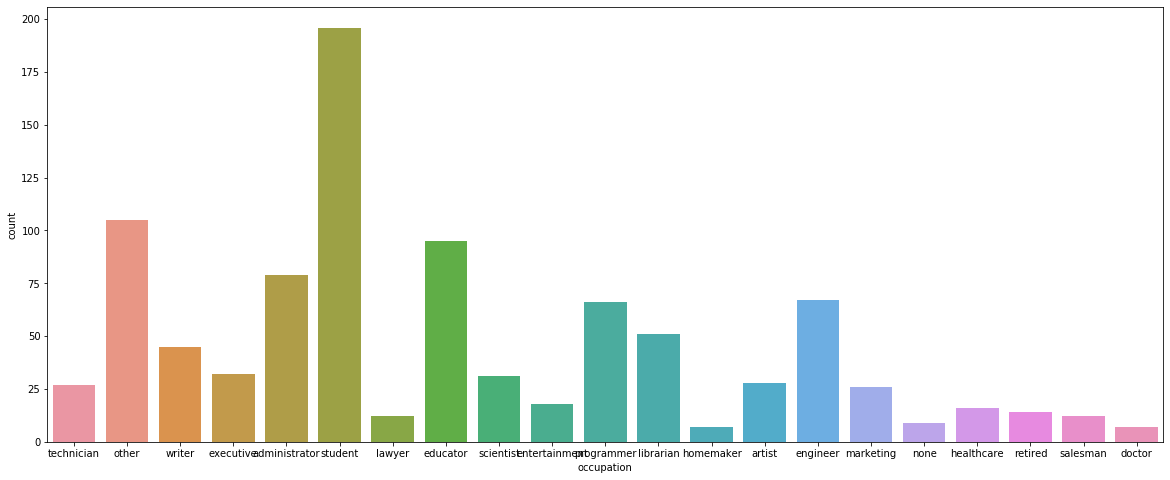

In [20]:
fig = plt.figure(figsize=(20,8))

sns.countplot(x='occupation',data=user_features)

Most of them are students.
No categorize them by occupations!

In [21]:
user_features.groupby(['occupation']).mean()

,user id,age,M,administrator,artist,doctor,educator,engineer,entertainment,executive,...,librarian,marketing,none,programmer,retired,salesman,scientist,student,technician,writer
occupation,,,,,,,,,,,,,,,,,,,,,
administrator,430.949367,38.746835,0.544304,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
artist,451.892857,31.392857,0.535714,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
doctor,533.714286,43.571429,1.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
educator,466.905263,42.010526,0.726316,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
engineer,456.328358,36.388060,0.970149,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
entertainment,398.000000,29.222222,0.888889,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
executive,422.312500,38.718750,0.906250,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
healthcare,501.437500,41.562500,0.312500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
homemaker,443.000000,32.571429,0.142857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Item information: About movies 


u.item     -- Information about the items (movies); this is a tab separated
              list of
              movie id | movie title | release date | video release date |
              IMDb URL | unknown | Action | Adventure | Animation |
              Children's | Comedy | Crime | Documentary | Drama | Fantasy |
              Film-Noir | Horror | Musical | Mystery | Romance | Sci-Fi |
              Thriller | War | Western |
              The last 19 fields are the genres, a 1 indicates the movie
              is of that genre, a 0 indicates it is not; movies can be in
              several genres at once.
              The movie ids are the ones used in the u.data data set.

u.genre    -- A list of the genres.

In [22]:
item_name= ['movie_id','movie title','release date','video release date','IMDb URL','unknown','Action','Adventure','Animation','Children','Comedy','Crime','Documentary','Drama','Fantasy','Noir','Horror','Musical','Mystery','Romance','SciFi','Thriller','War','Western']
                
                
                

In [23]:
movie_features = pd.read_csv('u.item',sep='|',names=item_name,engine='python')

In [24]:
movie_features.head()

,movie_id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children,...,Fantasy,Noir,Horror,Musical,Mystery,Romance,SciFi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [25]:
mean= movie_features.mean(axis=0,skipna=True)

In [26]:
mean

movie_id              841.500000
video release date           NaN
unknown                 0.001189
Action                  0.149227
Adventure               0.080262
Animation               0.024970
Children                0.072533
Comedy                  0.300238
Crime                   0.064804
Documentary             0.029727
Drama                   0.431034
Fantasy                 0.013080
Noir                    0.014269
Horror                  0.054697
Musical                 0.033294
Mystery                 0.036266
Romance                 0.146849
SciFi                   0.060048
Thriller                0.149227
War                     0.042212
Western                 0.016052
dtype: float64

In [27]:
means = pd.DataFrame(data=mean,columns=['mean'])

In [28]:
means

,mean
movie_id,841.500000
video release date,NaN
unknown,0.001189
Action,0.149227
Adventure,0.080262
Animation,0.024970
Children,0.072533
Comedy,0.300238
Crime,0.064804
Documentary,0.029727


In [29]:
means=means.drop(['movie_id','video release date'],axis=0)


In [30]:
means = means.reset_index()

In [31]:
means

,index,mean
0,unknown,0.001189
1,Action,0.149227
2,Adventure,0.080262
3,Animation,0.024970
4,Children,0.072533
5,Comedy,0.300238
6,Crime,0.064804
7,Documentary,0.029727
8,Drama,0.431034
9,Fantasy,0.013080


In [32]:
means['genre']=means['index']

In [33]:
means = means.drop(['index'],axis=1)

In [34]:
means['mean']=means['mean']*100

Text(0, 0.5, 'Mean Percentage')

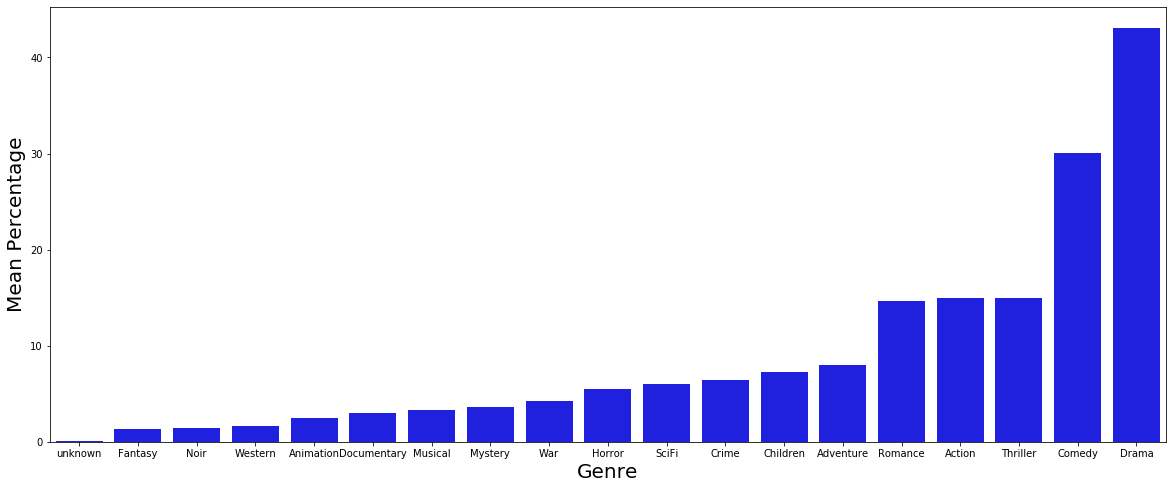

In [35]:
figs= plt.figure(figsize=[20,8])
sns.barplot(x='genre',y='mean', data=means,order=means.sort_values('mean')['genre'],color='blue')
plt.xlabel('Genre',size=20)
plt.ylabel('Mean Percentage',size=20)

You observe that drama and comedy are two popular genre of movies that have been watched by the customers.

# Data Splitting: 



u.data     -- The full u data set, 100000 ratings by 943 users on 1682 items.
              Each user has rated at least 20 movies.  Users and items are
              numbered consecutively from 1.  The data is randomly
              ordered. This is a tab separated list of 
              
              
	         user id | item id | rating | timestamp.
            
            
            
 -------------------



u1.base    -- The data sets u1.base and u1.test through u5.base and u5.test
u1.test       are 80%/20% splits of the u data into training and test data.
u2.base       Each of u1, ..., u5 have disjoint test sets; this if for
u2.test       5 fold cross validation (where you repeat your experiment
u3.base       with each training and test set and average the results).
u3.test       These data sets can be generated from u.data by mku.sh.
u4.base
u4.test
u5.base
u5.test


-
We use one of the folds for training and test set:U1.   80/20



In [36]:
name_traintes = ['user_id','item _id','rating','timestamp']
train = pd.read_csv('u1.base',sep='\t',names=name_traintes)

In [37]:
test =  pd.read_csv('u1.test',sep='\t',names=name_traintes)

In [38]:
train.head()

,user_id,item _id,rating,timestamp
0,1,1,5,874965758
1,1,2,3,876893171
2,1,3,4,878542960
3,1,4,3,876893119
4,1,5,3,889751712


In [39]:
test.head()

,user_id,item _id,rating,timestamp
0,1,6,5,887431973
1,1,10,3,875693118
2,1,12,5,878542960
3,1,14,5,874965706
4,1,17,3,875073198


In [40]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   user_id    80000 non-null  int64
 1   item _id   80000 non-null  int64
 2   rating     80000 non-null  int64
 3   timestamp  80000 non-null  int64
dtypes: int64(4)
memory usage: 2.4 MB


# First find how many items arerated by each user?!

In [41]:
movie_peruser = train.groupby('user_id')['rating'].count().sort_values(ascending=False)

In [42]:
movie_peruser


user_id
655    685
405    582
450    494
537    490
416    417
      ... 
93       9
36       9
258      8
228      7
310      4
Name: rating, Length: 943, dtype: int64

In [43]:
movie_user = pd.DataFrame(data=movie_peruser)

In [44]:
movie_user

,rating
user_id,
655,685
405,582
450,494
537,490
416,417
...,...
93,9
36,9
258,8


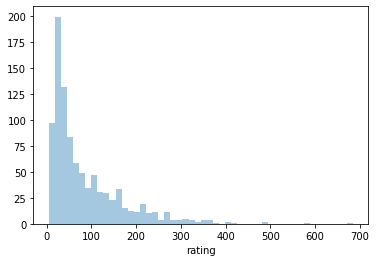

In [45]:
sns.distplot(movie_user['rating'],bins=50,kde=False)

The table and figure above show the number of movies watched per user. Most of the users have rated less than 100 movies. 
Some of them have zero ratings. 

# Now find how many ratings are given to each item?!

In [46]:
rated_permovie =train.groupby('item _id')['rating'].count().sort_values(ascending=False)



In [47]:
rated_permovie

item _id
50      484
181     422
258     402
100     395
294     394
       ... 
1342      1
1577      1
1578      1
1579      1
1682      1
Name: rating, Length: 1650, dtype: int64

There are some items with 1 ratings...

In [48]:
rat_permovie = pd.DataFrame(data=rated_permovie)

In [49]:
rat_permovie.reset_index()

,item _id,rating
0,50,484
1,181,422
2,258,402
3,100,395
4,294,394
...,...,...
1645,1342,1
1646,1577,1
1647,1578,1
1648,1579,1


The table above shows the movies that have high numbe of ratings. And shows number of rting per movie. It seems thereare 1650 movies and 943 users.

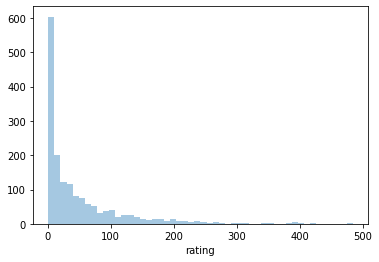

In [50]:
sns.distplot(rat_permovie['rating'],bins=50,kde=False)

There are some movies with zero or rating . So its better not to consider them later.

# Matrix factorization

# Imagine there is a user-item rating matrix which is sparse. 
This matrix can be obtained explicitely and have retes[1,2,3,4,5] for the rate each user gives to each item; Or, it can be 
obtained implicitely. Implicitely, is if the movie has been clicked by the user. Based on the click, the rating would be 0  or 1. 
So, explicit information is much better like reviews. However, most of the time implicit data are more accesible. 


Now, imagine there is a user-item matrix explicit rating  available: 
         
     
                item
            [5 - - - 4
      user   4 - 2 1 -
             - 2 - 3 - ]
   
    We just consider 1, as the rated movies and we do not consider the items that have values=0 for now. 
              item 
     user  [5 0 0 0 1
            4 0 2 1 0
            0 2 0 3 0 ]
    In other words, if there is a movie that has not visited by the user we give value=0 , and the goal is to find it. 
    


# The main objective is to find the missing values of this matrix. 
Since the user-item rating matrix is very sparse(meaning there are a lot of missing data in that) and dimensional, we decompose or factorize this matrix into 2 other matrix. This way finding the missing data is easier and number of dimensions increase. This technique works very well for the large scales data sets.


user-feature * feature-item = user-item rating matrix

u_f * f_i = uir_predict

The goal is to find the user features and items features and then we can multiply the values to find the ratings. 


We initialize the user_features and item_features by finding random values. 
In each iteration we try to train the values better and better.

This technique is called gradiant descent.

    

# Gradiant Descent Optimization algorithm: 

This algorithm can minimize the sum  or mean of squared error as loss function.

Imagine, we initialize user-feature * feature-item  to find user-item rating matrix (uir_predict)

There is also actual user-item rating matrix available (uir_actual)
we subtract these two matrices.

# objective : min sum (uir_actual-uir_predict)**2
    
we also consider regularization   
uir_predict = u_f * f_i

each iteration we update u_f and f_i.

How? 

step1= Find derivatives of the objective with respect  to u_f and f_i. 

step 2= consider a learning rate which shows how much we deviate the objective to minimize the error. The learning rate is parameters with small value.

in each iteration(t) we update the u_f and f_i like the following method:
    
    u_f(new) = u_f(t-1) + learning rate * derivative of u_f
    f_i(new) =f_i(t-1)+ learning rate * derivative of f_i

    then we redo the optimization with finding the error and differences between the error and checking the error. 
    
    
    


This is the loss function : 
The cost function for ridge regression:
It will penalize sum of squared error(min sum (uir_actual-uir_predict)**2) + lambda*(||p||2+||q||2)=> ridge regression


# What is the stoping criteria? 


The stopping criteria can be number of iterations which is a big number that we make sure there is no more improvement. 

Or, it can be the difference between error such that if it is less than a small value, so we stop. 

Or, we can consider two last error, if there is no more improvement, we stop. 

Now, lets start!

# Note:
    
The data belonging to the test set in recommender systems are not linked to a new individual, but rather to new evaluations made by the same set of individuals. 


Therefore the data in training testing and validations are dependent.
    
    
    
    

In [51]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   user_id    80000 non-null  int64
 1   item _id   80000 non-null  int64
 2   rating     80000 non-null  int64
 3   timestamp  80000 non-null  int64
dtypes: int64(4)
memory usage: 2.4 MB


In [52]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   user_id    20000 non-null  int64
 1   item _id   20000 non-null  int64
 2   rating     20000 non-null  int64
 3   timestamp  20000 non-null  int64
dtypes: int64(4)
memory usage: 625.1 KB


In [53]:
number_item = len(rated_permovie)
number_item

1650

In [54]:
rating_matrix = train.pivot_table(index='user_id',columns ='item _id',values ='rating')

In [55]:
rating_matrix

item _id,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
user_id,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,4.0,3.0,3.0,NaN,4.0,1.0,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,2.0,NaN,NaN,4.0,5.0,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,5.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# We convert the data frame into array. 

In [56]:
rating_array = rating_matrix.to_numpy()
rating_array

array([[ 5.,  3.,  4., ..., nan, nan, nan],
       [ 4., nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [ 5., nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan,  5., nan, ..., nan, nan, nan]])

Now check number of rows and columns:

1- number of rows


2- number of columns

In [57]:
len(rating_array)

943

In [58]:
len(rating_array[0])

1650

Note that we split the data train into train and valid, trains are those data that have value >0 , or are not zero, so we just use those data for training. 


The rests are zero, or do not have ratig , we consider them as valid we want to predict values for them, 

# step1 **
Initialize and split data into training set, test set and validation.
The training
the validations are those user-item ratings that have not been rated.
trains are the ones that have ratings=1


In [59]:
def train_validate(rating_array, splitpercent, tensor=False):
    #we change the arrays to list and initialize them by zero values, for those that have been rated we change the values 
    #to 1  otherwise they are zero. Here we have list of training, with 1 if liked, or visited, zero, otherwise,we want to find zeros
    training_set = np.zeros((len(rating_array), len(rating_array[0]))).tolist()
    validation_set = np.zeros((len(rating_array), len(rating_array[0]))).tolist()
    
    for i in range(len(rating_array)):
        for j in range(len(rating_array[i])):
            if rating_array[i][j] > 0:
                if np.random.binomial(1, splitpercent, 1):
                    training_set[i][j] = rating_array[i][j]
                else:
                    validation_set[i][j] = rating_array[i][j]

    return [training_set, validation_set]

training = train_validate(rating_array, 0.8)
testing = test

The above function, find the training ratings among the ratings that have value =1  and do not consider the ones without values. The rests are zero. 

# Step 2: 
    In this step we need to initialize user_featurs and item features. 
    For doing that we first need to define how many features we should consider. 
    First we can cosnider 8, then in data analysis we can change them to see how the results will change and if it makes it faster or not.
    after definging featres umber, we randomly obtain user features and item features. 
    
1- We initialize user features, item featurs and number of featues. 

2- Multiply user-feaures*features-item to obtain a predicted rating values.

3- In each iteration the predicted value should be updated. 

4- Find the differnce betwene the actual value and the predictced values.

5- cosnider the error for those that have values=1.

-6 In each itertion, check stpping criteria. whenever, 1- the error is less than specific amount, or theiteration numbrs are finished , or the last two erros in the last two iteraions are very closed to each other , the errr is good enough nd we stop. 


 


# Matrix Factorization Recommenation Systems Algorithm:

The bellow function returns the best error, and will find recommnedations.


# The inputs are:
learning rate =>learn_rate= 0.0001
Weight for regularization= 0.03
the epsilon or stoping criteria => 0.001
number of features= 8
number of iterations=80
 

# The Outputs: 
the user-feature and feature-item matrices and the differnce between the actual ratig and predicted ones, for trainnig and. validation. 

In [60]:
def recommender_system(training, weight, epsilon, learn_rate, iters,feat):


    
    training_set=training[0]
    validation_set=training[1]
    user_numbers=len(training_set)
    items_numbers = len(training_set[0])

    

#There are two empy set, trining error and validation error te goal is to minimize them. and in each iteration they are updated. validation error are related to the predictet ratings for those which the ratings were availables.
    trainerror, validationerror = [], []
    
    user_features = np.random.rand(user_numbers, feat) *0.1
    features_item = np.random.rand(items_numbers,feat ) *0.1
    
    for t in range(iters):        
        for i in range(user_numbers):
            for j in range(items_numbers):
            

         #if the train value is 1 ,we consider it, otherwise we dont. 
                if training_set[i][j] > 0:
                    error = training_set[i][j] - predted_values(user_features, features_item, i, j)
                    #now e update the user-features and features-item in the iteration using gradiant descent
                    user_features, features_item = gradiant_descent(error, user_features, features_item, i, j,learn_rate, feat,weight)
                               
        #we fill out the updated loss_function
        trainerror.append(loss_function(training_set, user_features, features_item))
        validationerror.append(loss_function(validation_set,user_features, features_item))
        

        if t %5==0:
            print("Ieration number:" ,"{:3.0f}".format(t+1), "Training error:", "{:3.3f}".format(trainerror[-1]),"   Validating errro", "{:3.3f}".format(validationerror[-1]))
      
    #stoping criteria
        # For now we consider the stoping criteria as the loss function error should be less than epsilon.
        # if the obtain current error is less than epsilon or small number we stop
        if abs(trainerror[-1]) < epsilon:
            break
        # We can later add another stoping criteria    
        # other stopping criteria. if last two errors difference are less than a small amount we can stop...not very accurate
    #   if abs(validationerror[-1] - validationerror[-2]) < 0.001:
          #  break
        
    return user_features, features_item, trainerror, validationerror




# Finding loss function

In [61]:
#We preict the user*item feautes values in next function
def predted_values(user_features, features_item, i, j):

    return np.dot(user_features[i, :], features_item[j, :])



In [62]:
#In another fnction we find the loss function:************It is mean squared error

def loss_function(evaluation, user_features, features_item):
    mean_error , total_values  = 0., 0

    for i in range(len(evaluation)):
        for j in range(len(evaluation[i])):
            
            if evaluation[i][j] > 0:
                #pow:squares
                mean_error+= pow(evaluation[i][j] - predted_values(user_features, features_item, i, j), 2)
                total_values += 1
    return mean_error / total_values 

# Gradiant Descent 
Now its time to use gradiant descent to update features. find derivatives. and minimize the loss function with considering the ridge regularization:
below is the total formula: 
after finding derivatives with respct to user features and features items.

user_features(𝑡+1)𝑢←user_features(𝑡)+  learning-rate * (loss-error*features_item(𝑡)  _ weight⋅user_features)


features_item(𝑡+1)𝑖←features_item(𝑡)𝑖+     learning-rate * (loss-error*(𝑡)*user_features  _ weight*features_item(𝑡)),

In [63]:
def gradiant_descent(error, user_features, features_item, user_id, item_id,learn_rate, feat,weight):
 
    for f in range(feat):
        user_features[user_id, f] = user_features[user_id, f] + (learn_rate * (error * features_item[item_id,f] - weight * user_features[user_id, f]))
        features_item[item_id,f] = features_item[item_id,f] + (learn_rate * (error * user_features[user_id, f] - weight * features_item[item_id,f]))
        
    return user_features, features_item

# Now its time to train model
It is time to train model with different parameters.


To see how training and testing work base on that. 

In [64]:
weight=0.03
epsilon=0.001
learn_rate=0.01
iters=80
feat=5
user_features, features_item, trainerror, validationerror = recommender_system(training, weight, epsilon, learn_rate, iters,feat)


Ieration number: 1.000 Training error: 4.398    Validating errro 4.545
Ieration number: 6.000 Training error: 0.924    Validating errro 1.011
Ieration number: 11.000 Training error: 0.875    Validating errro 0.957
Ieration number: 16.000 Training error: 0.837    Validating errro 0.929
Ieration number: 21.000 Training error: 0.775    Validating errro 0.901
Ieration number: 26.000 Training error: 0.722    Validating errro 0.892
Ieration number: 31.000 Training error: 0.687    Validating errro 0.895
Ieration number: 36.000 Training error: 0.665    Validating errro 0.900
Ieration number: 41.000 Training error: 0.651    Validating errro 0.904
Ieration number: 46.000 Training error: 0.640    Validating errro 0.907
Ieration number: 51.000 Training error: 0.633    Validating errro 0.911
Ieration number: 56.000 Training error: 0.626    Validating errro 0.914
Ieration number: 61.000 Training error: 0.622    Validating errro 0.917
Ieration number: 66.000 Training error: 0.618    Validating errro 

Now you se that the model works better for the training set and is not bad for validation. The validation are those ratings which were not available from past. 
Now it is time to manipulate more with hyper parameters to see which parameters are work better.


# Sensitivity Analysis

In [69]:
weight=0.02
epsilon=0.001
learn_rate=0.001
iters=130
feat=8
user_features, features_item, trainerror, validationerror = recommender_system(training, weight, epsilon, learn_rate, iters,feat)


Ieration number: 1.000 Training error: 13.358    Validating errro 13.437
Ieration number: 6.000 Training error: 6.541    Validating errro 6.724
Ieration number: 11.000 Training error: 2.483    Validating errro 2.619
Ieration number: 16.000 Training error: 1.593    Validating errro 1.703
Ieration number: 21.000 Training error: 1.267    Validating errro 1.366
Ieration number: 26.000 Training error: 1.114    Validating errro 1.208
Ieration number: 31.000 Training error: 1.029    Validating errro 1.120
Ieration number: 36.000 Training error: 0.978    Validating errro 1.067
Ieration number: 41.000 Training error: 0.945    Validating errro 1.032
Ieration number: 46.000 Training error: 0.921    Validating errro 1.008
Ieration number: 51.000 Training error: 0.905    Validating errro 0.990
Ieration number: 56.000 Training error: 0.892    Validating errro 0.976
Ieration number: 61.000 Training error: 0.882    Validating errro 0.965
Ieration number: 66.000 Training error: 0.874    Validating errr

In [70]:
weight=0.03
epsilon=0.05
learn_rate=0.01
iters=150
feat=4
user_features, features_item, trainerror, validationerror = recommender_system(training, weight, epsilon, learn_rate, iters,feat)


Ieration number: 1.000 Training error: 4.516    Validating errro 4.664
Ieration number: 6.000 Training error: 0.926    Validating errro 1.013
Ieration number: 11.000 Training error: 0.877    Validating errro 0.958
Ieration number: 16.000 Training error: 0.845    Validating errro 0.933
Ieration number: 21.000 Training error: 0.794    Validating errro 0.907
Ieration number: 26.000 Training error: 0.749    Validating errro 0.897
Ieration number: 31.000 Training error: 0.720    Validating errro 0.897
Ieration number: 36.000 Training error: 0.703    Validating errro 0.899
Ieration number: 41.000 Training error: 0.692    Validating errro 0.901
Ieration number: 46.000 Training error: 0.683    Validating errro 0.903
Ieration number: 51.000 Training error: 0.677    Validating errro 0.905
Ieration number: 56.000 Training error: 0.672    Validating errro 0.906
Ieration number: 61.000 Training error: 0.668    Validating errro 0.907
Ieration number: 66.000 Training error: 0.665    Validating errro 

Iteration 41 the validation error is less than other iterations. 
So, increasing number of iteration is not always working. We make number of itertion smaller and change the learning learn. 

In [73]:
weight=0.03
epsilon=0.001
learn_rate=0.001
iters=50
feat=6
user_features, features_item, trainerror, validationerror = recommender_system(training, weight, epsilon, learn_rate, iters,feat)


Ieration number: 1.000 Training error: 13.443    Validating errro 13.522
Ieration number: 6.000 Training error: 7.332    Validating errro 7.511
Ieration number: 11.000 Training error: 2.650    Validating errro 2.790
Ieration number: 16.000 Training error: 1.654    Validating errro 1.765
Ieration number: 21.000 Training error: 1.297    Validating errro 1.398
Ieration number: 26.000 Training error: 1.131    Validating errro 1.226
Ieration number: 31.000 Training error: 1.041    Validating errro 1.133
Ieration number: 36.000 Training error: 0.987    Validating errro 1.077
Ieration number: 41.000 Training error: 0.952    Validating errro 1.039
Ieration number: 46.000 Training error: 0.927    Validating errro 1.014


You see increasing number of features just makes it harder to solve. 

In [75]:
weight=0.03
epsilon=0.001
learn_rate=0.001
iters=50
feat=3
user_features, features_item, trainerror, validationerror = recommender_system(training, weight, epsilon, learn_rate, iters,feat)


Ieration number: 1.000 Training error: 13.560    Validating errro 13.639
Ieration number: 6.000 Training error: 9.108    Validating errro 9.269
Ieration number: 11.000 Training error: 3.066    Validating errro 3.221
Ieration number: 16.000 Training error: 1.794    Validating errro 1.913
Ieration number: 21.000 Training error: 1.362    Validating errro 1.467
Ieration number: 26.000 Training error: 1.168    Validating errro 1.266
Ieration number: 31.000 Training error: 1.064    Validating errro 1.158
Ieration number: 36.000 Training error: 1.003    Validating errro 1.094
Ieration number: 41.000 Training error: 0.963    Validating errro 1.053
Ieration number: 46.000 Training error: 0.936    Validating errro 1.024


So, by changing parameters different results will be obtained.

# Example: Find the 20 best items for user x
Now that we have trained the model, we. can find the recommendation to each user separately using the model. 

This time we can find the features in the validation part. 
So there is a user_feaure vector like user_1,5 which is related to user 1 with 5 features. We multiply this by transpose of th items_features. 
wich can be like item_5,945. The out put is  user_1,5* item_5,945=user_item (1,945) which ahows the ratings of the 945 items for user 1. 
So, we can rank based on the hghest and find the most ratings films and recommend that. This recommendation can be categorized by type of the film. For example we can find top best drama movies for someone.


# Done :)